<a href="https://colab.research.google.com/github/Jain-Nishkarsh/BITS-ACM-R2-Progress/blob/main/GoogleColabNotebooks/PyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I used the Quickstart and PyTorch Documentation to study and program this Neural Network

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [ ]:
# training_data = datasets.MNIST(
#     root="data",
#     train = True,
#     download = True,
#     transform = ToTensor()
# )

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 50
train_dataloader = DataLoader(training_data,batch_size)
test_dataloader = DataLoader(test_data,batch_size)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


##Here I tried using different loss functions, and optimizers

Used Stochastic gradient descent first and the stuck with Adam optimizer. Using the adam optimizer, the network oscillates between lower and higher Loss value but still gives much higher accuracy than SGD and many other optimizers.
Tried changing Loss functions aswell but cross-entropy loss just stuck.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

It is at the 

```
optimizer.zero_grad()
loss.backward()
optimizer.step()
```
that the neural network goes through with Back-propogation and starts optimizing the values of weights and biases accordingly to get the best fit.

After enough epochs, the loss function starts converging and the predictions become more accurate.


In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X,y in dataloader:
            X,y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306139  [    0/60000]
loss: 0.426082  [ 5000/60000]
loss: 0.400924  [10000/60000]
loss: 0.288102  [15000/60000]
loss: 0.355184  [20000/60000]
loss: 0.060820  [25000/60000]
loss: 0.251959  [30000/60000]
loss: 0.051168  [35000/60000]
loss: 0.181809  [40000/60000]
loss: 0.186456  [45000/60000]
loss: 0.103239  [50000/60000]
loss: 0.033864  [55000/60000]
Test Error: 
 Accuracy: 95.7%, Avg loss: 0.137013 

Epoch 2
-------------------------------
loss: 0.073482  [    0/60000]
loss: 0.036118  [ 5000/60000]
loss: 0.245745  [10000/60000]
loss: 0.020517  [15000/60000]
loss: 0.100581  [20000/60000]
loss: 0.011988  [25000/60000]
loss: 0.180033  [30000/60000]
loss: 0.036387  [35000/60000]
loss: 0.151261  [40000/60000]
loss: 0.070121  [45000/60000]
loss: 0.033765  [50000/60000]
loss: 0.019060  [55000/60000]
Test Error: 
 Accuracy: 96.2%, Avg loss: 0.120616 

Epoch 3
-------------------------------
loss: 0.068241  [    0/60000]
loss: 0.048358  [ 5000/600

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

### Here, these are 9 random images from the dataset and their corresponding titles show the predicted value by the neural network

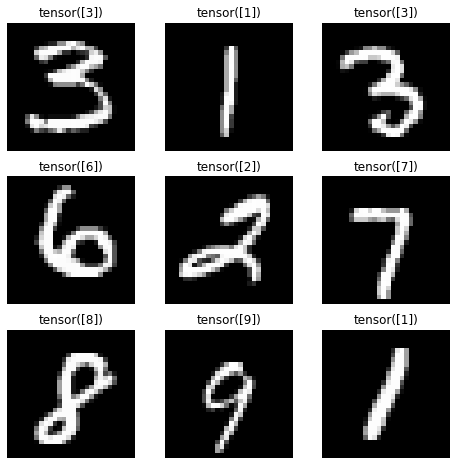

In [ ]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title((label==1.0).nonzero(as_tuple=True)[0])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()



---


**I am aware that with more time, this network can be made much more faster, efficient and accurate by giving it more time and using even more combinations of different loss, activation functions and optimizers.**

---

